These data were published in percentages relative to water. This is a hard way to read the data so Chris Dreyer and George Sowers converted them to weight percent. They provided the updated table to us in a personel communication Spring 2020.


------------------------------------------------------------------------
![ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris [2].png](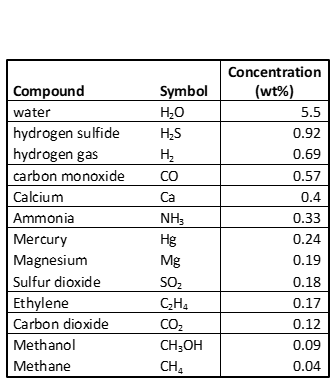) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#first method of creating a pandas dataframe. In this we manually created a dictionary of the values and converted to a dataframe. 
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04]}
df = pd.DataFrame(data)
df

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,calcium,Ca,0.40
5,ammonia,NH3,0.33
6,mercury,Hg,0.24
7,magnesium,Mg,0.19
8,sulfur dioxide,SO2,0.18
9,ethylene,C2H4,0.17


In [ ]:
pip install molmass #https://pypi.org/project/molmass/

     |████████████████████████████████| 71kB 5.0MB/s 


In [ ]:
from molmass import Formula

In [ ]:
f = Formula('')

f_composition=[]
f_composition_total=[]
lenlen=[]

for molecule in df['Symbol']:
  #print(molecule)
  f = Formula(molecule)
  #print(f.isotope.mass)
  #print(f.composition().total)
  f_composition.append(f.isotope.mass)
  f_composition_total.append(f.composition())
  lenlen.append(len(f.composition()))
  #f_molecule=f.formula
  #print(f_composition)
  #print(f_molecule)


element_name=[]
element_number=[]
element_rel_mass=[]
element_frac=[]
for i in range(len(f_composition_total)):
  for k in range(lenlen[i]):
    element_name.append(f_composition_total[i][k][0])
    element_number.append(f_composition_total[i][k][1])
    element_rel_mass.append(f_composition_total[i][k][2])
    element_frac.append(f_composition_total[i][k][3])

#print(len(element_name),len(element_number),len(element_rel_mass),len(element_frac))


new_frame={
    'VolatileCompound' : ['water','water','hydrogen sulfide','hydrogen sulfide','hydrogen gas','carbon monoxide','carbon monoxide','calcium','ammonia','ammonia','mercury','magnesium',
                  'sulfur dioxide','sulfur dioxide','ethylene','ethylene','carbon dioxide','carbon dioxide','methanol','methanol','methanol','methane','methane'],
    'Symbol' : ['H2O','H2O','H2S','H2S','H2','CO','CO','Ca','NH3','NH3','Hg','Mg','SO2','SO2','C2H4','C2H4','CO2','CO2','CH3OH','CH3OH','CH3OH','CH4','CH4'],
    'wt%' : [5.50,5.50,0.92,0.92,0.69,0.57,0.57,0.4,0.33,0.33,0.24,0.19,0.18,0.18,0.17,0.17,0.12,0.12,0.09,0.09,0.09,0.04,0.04],
    'Element': element_name,
    'Number' : element_number,
    'ElementRelMass' : element_rel_mass,
    'ElementFrac%' : element_frac
}
df_new_frame=pd.DataFrame(new_frame)
df_new_frame


,VolatileCompound,Symbol,wt%,Element,Number,ElementRelMass,ElementFrac%
0,water,H2O,5.50,H,2,2.015882,0.111898
1,water,H2O,5.50,O,1,15.999405,0.888102
2,hydrogen sulfide,H2S,0.92,H,2,2.015882,0.059150
3,hydrogen sulfide,H2S,0.92,S,1,32.064800,0.940850
4,hydrogen gas,H2,0.69,H,2,2.015882,1.000000
5,carbon monoxide,CO,0.57,C,1,12.010740,0.428800
6,carbon monoxide,CO,0.57,O,1,15.999405,0.571200
7,calcium,Ca,0.40,Ca,1,40.078000,1.000000
8,ammonia,NH3,0.33,H,3,3.023823,0.177553
9,ammonia,NH3,0.33,N,1,14.006703,0.822447


In [ ]:
df_new_frame['ElementWt%']=df_new_frame['wt%']*(df_new_frame['ElementFrac%'])

In [ ]:
df_new_frame

,VolatileCompound,Symbol,wt%,Element,Number,ElementRelMass,ElementFrac%,ElementWt%
0,water,H2O,5.50,H,2,2.015882,0.111898,0.615441
1,water,H2O,5.50,O,1,15.999405,0.888102,4.884559
2,hydrogen sulfide,H2S,0.92,H,2,2.015882,0.059150,0.054418
3,hydrogen sulfide,H2S,0.92,S,1,32.064800,0.940850,0.865582
4,hydrogen gas,H2,0.69,H,2,2.015882,1.000000,0.690000
5,carbon monoxide,CO,0.57,C,1,12.010740,0.428800,0.244416
6,carbon monoxide,CO,0.57,O,1,15.999405,0.571200,0.325584
7,calcium,Ca,0.40,Ca,1,40.078000,1.000000,0.400000
8,ammonia,NH3,0.33,H,3,3.023823,0.177553,0.058593
9,ammonia,NH3,0.33,N,1,14.006703,0.822447,0.271407


In [ ]:
df_new_frame_groupby=df_new_frame.groupby(by=df_new_frame['Element']).sum().reset_index()
df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)

,Element,wt%,Number,ElementRelMass,ElementFrac%,ElementWt%
6,O,6.46,7,111.995835,3.185202,5.432240
2,H,7.74,21,21.166761,1.869466,1.464261
7,S,1.10,2,64.129600,1.441365,0.955674
0,C,0.99,6,72.064440,2.681521,0.486416
1,Ca,0.40,1,40.078000,1.000000,0.400000
5,N,0.33,1,14.006703,0.822447,0.271407
3,Hg,0.24,1,200.592000,1.000000,0.240000
4,Mg,0.19,1,24.305100,1.000000,0.190000


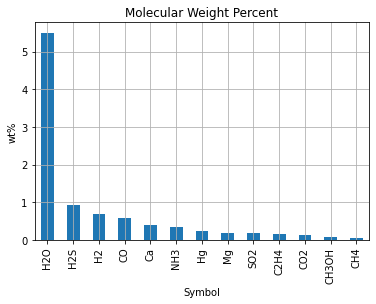

In [ ]:
# using the principals of minimizing unnecessary color to usful data ink this histogram conveys the information simply.
df.plot(x='Symbol', y='Concentration (wt%)', kind='bar', legend=False)  
plt.ylabel('wt%')
plt.xlabel('Symbol')
plt.title('Molecular Weight Percent')
plt.grid()
plt.show()

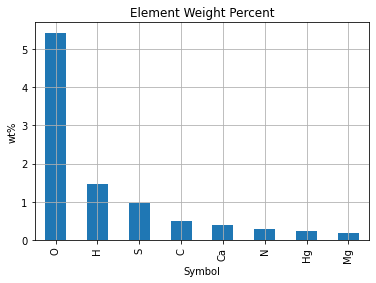

In [ ]:
# using the principals of minimizing unnecessary color to usful data ink this histogram conveys the information simply.
df_elem_sort = df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)
df_elem_sort.plot(x='Element', y='ElementWt%', kind='bar', legend=False)  
plt.ylabel('wt%')
plt.xlabel('Symbol')
plt.title('Element Weight Percent')
plt.grid()
plt.show()

#Alternate attempt at calculation.

In [ ]:
import chemparse #import chemparse 
#print(chemparse.parse_formula("C6H12O6")) #test with given example

ModuleNotFoundError: ignored

In [ ]:
elements=[]
for i in range(len(df['Symbol'].to_list())):
  elements.append(chemparse.parse_formula(df['Symbol'].to_list()[i]))
elements

In [ ]:
Formula(df['Symbol'].to_list()[0]).composition()[0]

In [ ]:
df_e = pd.DataFrame(elements) #convert the list to a Pandas dataframe
#df_e

In [ ]:
df_m = pd.concat([df, df_e], axis=1, sort=False) #combine the results of parsing the molecules with the original dataframe
df_m=df_m.fillna(0) #fill the NaN with 0
df_m['mass']=f_composition
df_m

In [ ]:
df_m['mass']